In [7]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [8]:
from sklearn.datasets import load_digits

In [9]:
digits=load_digits()

In [10]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [12]:
df=pd.DataFrame(digits.data)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [15]:
df['target']=digits.target

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [26]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

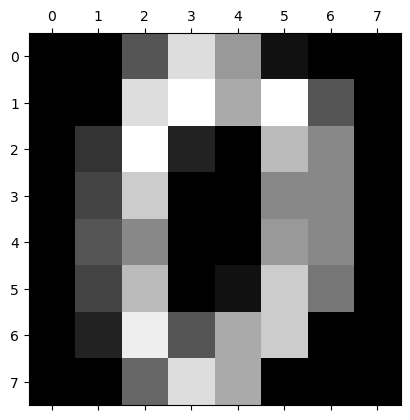

In [29]:
plt.gray()
plt.matshow(digits.images[0])

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    
     'gaussian_naivebayes' : {
        'model': GaussianNB(),
         'params':{
             
         }
        
    },
    
     'multinomial_naivebayes' : {
        'model': MultinomialNB(),
         'params':{
             
         }
        
    },
    
     'decision_tree' : {
        'model': DecisionTreeClassifier(),
         'params': {
            'criterion': ['gini','entropy'],
         }
         
    },
    
    
}

In [41]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(digits.data,digits.target)
    scores.append({
         'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
scores

[{'model': 'svm',
  'best_score': 0.9476973073351903,
  'best_params': {'C': 1, 'kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.9037511606313835,
  'best_params': {'n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.9221138966264315,
  'best_params': {'C': 1}},
 {'model': 'gaussian_naivebayes',
  'best_score': 0.8069281956050759,
  'best_params': {}},
 {'model': 'multinomial_naivebayes',
  'best_score': 0.8703497369235531,
  'best_params': {}},
 {'model': 'decision_tree',
  'best_score': 0.8208139894769421,
  'best_params': {'criterion': 'entropy'}}]

In [43]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.903751,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,gaussian_naivebayes,0.806928,{}
4,multinomial_naivebayes,0.870350,{}
5,decision_tree,0.820814,{'criterion': 'entropy'}


In [46]:
# svm is giving high accuracy 94.76% with c=1 and kernel=linear